<a href="https://colab.research.google.com/github/sparkysparo/Machine-Learning-for-Early-Prediction-Detection-and-Monitoring-of-Sepsis-in-A-E-and-ICU/blob/main/Project_MSC_Machine_Learning_for_Early_Prediction%2CDetection_and_Monitoring_of_Sepsis_in_A%26E_and_ICU_Settings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook Setup and Installation of Needed Library**

In [2]:
pip install scikit-learn==1.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [3]:
pip install xgboost==1.7.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [4]:
# Data handling
import pandas as pd
import numpy as np
import threadpoolctl

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )

# Statistics
from scipy import stats
from scipy.stats import shapiro, trim_mean, mstats, mode, ttest_ind

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from statistics import stdev
from sklearn.model_selection import KFold

# Other packages
import os, joblib

import warnings
warnings.filterwarnings("ignore")

#**Connecting Google Drive**

In [5]:
# Import and mount Google Drive.
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
# Navigating to the dataset folder in Google Drive
os.chdir('/content/drive/My Drive/Msc Data Science Project')

# **Loading The Dataset**

In [7]:
# Loading The  datasets
train_data = pd.read_csv('Paitients_Files_Train .csv')
test_data = pd.read_csv('Paitients_Files_Test .csv')

# **Datasets Overview**

**For Paitients Train Data**

In [8]:
# Displaying the first five rows.
train_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [9]:
# Dispalying the last five rows.
train_data.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
598,ICU200608,1,173,74,0,0,36.8,0.088,38,1,Positive


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [11]:
train_data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
train_data.shape

(599, 11)

In [13]:
#Checking for missing values
train_data.isnull().sum()

,0
ID,0
PRG,0
PL,0
PR,0
SK,0
TS,0
M11,0
BD2,0
Age,0
Insurance,0


<Axes: >

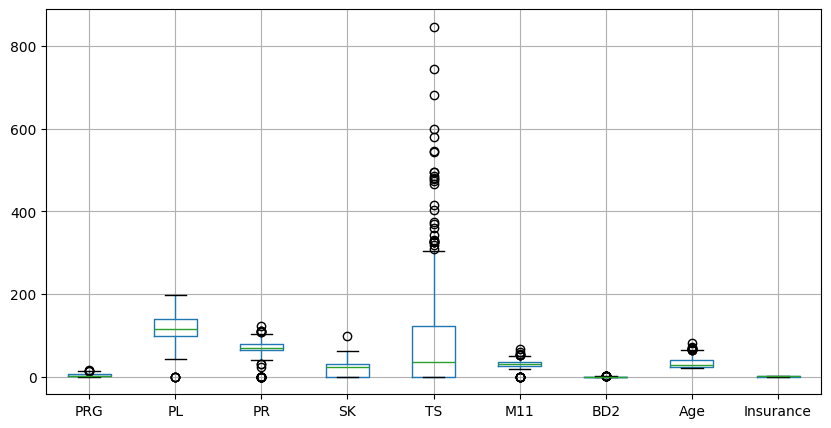

In [14]:
#Checking for outliers
train_data.boxplot(figsize=(10,5))

**Data Set Column Description**

---



ID - Unique number to represent patient ID

PRG - Plasma glucose

PL - Blood Work Result-1 (mu U/ml)

PR - Blood Pressure (mm Hg)

SK - Blood Work Result-2 (mm)

TS - Blood Work Result-3 (mu U/ml)

M11 - Body mass index (weight in kg/(height in m)^2

BD2 - Blood Work Result-4 (mu U/ml)

Age - patients age (years)

Insurance - If a patient holds a valid insurance card

Sepssis Target Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

**For Paitients Test Data**

In [15]:
test_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [16]:
test_data.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1
168,ICU200777,1,93,70,31,0,30.4,0.315,23,1


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [18]:
test_data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


In [19]:
test_data.shape

(169, 10)

In [20]:
test_data.isnull().sum()

,0
ID,0
PRG,0
PL,0
PR,0
SK,0
TS,0
M11,0
BD2,0
Age,0
Insurance,0


<Axes: >

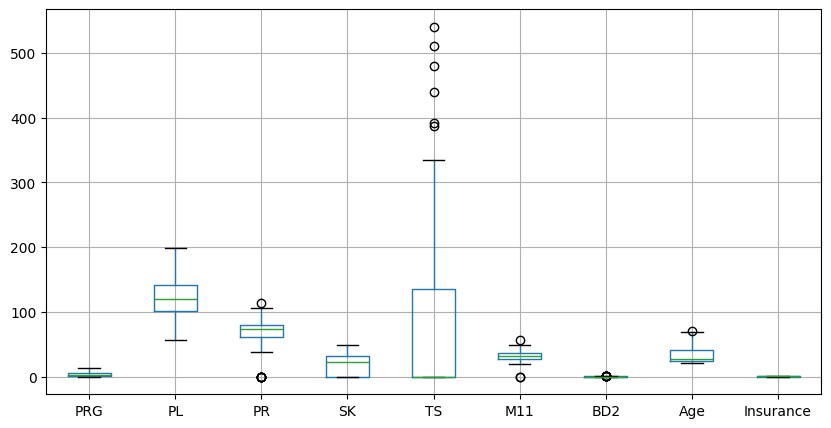

In [21]:
test_data.boxplot(figsize=(10,5))

**Issues With the Data**


---


Too many zeros in each columns


1.The column names are not very descriptive.

2.The target variable 'Sepssis' may have imbalanced classes.

3.There are many outliers in some of the numerical columns.

4.There could be correlations between some of the predictor variables, leading to multicollinearity.

**How i Intend to Solve Them**


---


1.Replace zeros in each column with the median value

2.Rename the column names to be more descriptive and easier to understand.

3.Handle the imbalanced classes in the target variable using techniques such as undersampling or oversampling.

4.Use visualization techniques such as box plots and scatter plots to identify outliers and then remove them.

5.Use correlation analysis to identify highly correlated variables and consider dropping or transforming them.

# **Hypothesis**

Null Hypothesis: Age does not determine whether a patient will develop Sepsis.

Alternate Hypothesis: Age determines whether a pateint will develop Sepsis.

# **Data Cleaning**

In [22]:
# First Rename the columns
train_data = train_data.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_R1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_R2",
    "TS": "Blood_Work_R3",
    "M11": "BMI",
    "BD2": "Blood_Work_R4",
    "Age": "Patient_age",
    "Sepssis": "Sepsis"})

In [23]:
numerical_features = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age']

In [24]:
train_data[numerical_features].describe()

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [25]:
train_data

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [26]:
#Extracting rows with 0 BMI
zero_bmi = train_data[train_data['BMI']==0.0]
zero_bmi

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive
49,ICU200059,7,105,0,0,0,0.0,0.305,24,0,Negative
60,ICU200070,2,84,0,0,0,0.0,0.304,21,0,Negative
81,ICU200091,2,74,0,0,0,0.0,0.102,22,1,Negative
145,ICU200155,0,102,75,23,0,0.0,0.572,21,1,Negative
371,ICU200381,0,118,64,23,89,0.0,1.731,21,1,Negative
426,ICU200436,0,94,0,0,0,0.0,0.256,25,0,Negative
494,ICU200504,3,80,0,0,0,0.0,0.174,22,1,Negative
522,ICU200532,6,114,0,0,0,0.0,0.189,26,1,Negative


In [27]:
# Removing rows with 0 BMI
train_data.drop(train_data[train_data['BMI'] == 0.0].index, inplace=True)

In [28]:
#confirming that all 0 BMIs have been removed from our dataset
zero_bmi2 = train_data[train_data['BMI']==0.0]
zero_bmi2

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis


In [29]:
# Another look at our dataset shows that most of our columns have 0 for values.
train_data

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


**Replacing Colums with 0 with their median value**

In [30]:
columns_with_too_many_zeros = ['Plasma_glucose', 'Blood_Work_R2', 'Blood_Work_R3']
for col in columns_with_too_many_zeros:
    train_data[col].replace(to_replace=0, value=train_data[col].median(), inplace=True)

In [31]:
train_data

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,ICU200010,6,148,72,35,39,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,39,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,23,39,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,3,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,3,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,3,67,76,23,39,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


**Checking for Outliers**

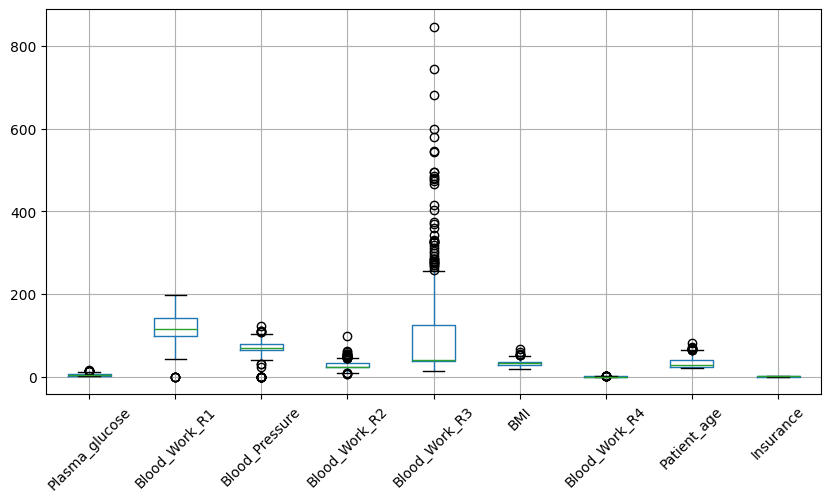

In [32]:
plt.figure(figsize=(10, 5))

# Plot the boxplot
train_data.boxplot()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Observation: All the numeric_columns except Insurance have outliers.**